# Overfitting and underfitting the Titanic
## Introduction
Before we start let us quickly look at a very graphic example of underfitting, a good fit, and overfitting.
We shall create an artificial dataset that consists of a noisy parabola, and to that also add some random outliers.
We then shall then fit the data to three models that have increasing degrees of freedom: a straight line, a parabola, and finally a high degree polynomial, each to the very same dataset:

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# Make the dataset:
# Create a noisy parabola
x_parabola = 50 * np.random.default_rng(100).random((50,))
y_parabola = ((x_parabola-15)**2) + (np.random.default_rng(30).random((50,))-0.5)*100
# add a few outliers
x_outliers = 50 * np.random.default_rng(80).random((10,))
y_outliers = ((x_outliers-15)**2) + (np.random.default_rng(500).random((10,))-0.5)*750
# concatenate the two groups of points together
x_points   = np.concatenate((x_parabola, x_outliers), axis=0)
y_points   = np.concatenate((y_parabola, y_outliers), axis=0)

# Now the plots and fits
###########################################################
# The 'underfitting' plot
###########################################################
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(3, 1, 1)
fig_1 = plt.scatter(x=x_points, y=y_points)
plt.axis('off')
x = np.linspace(0,50,400)
#ax.set_title ("underfitting", fontsize=18)
ax.text(10,450,'underfitting', fontsize=18)
fit = (np.polyfit(x_points,y_points, 1 ))
m = fit[0]
c = fit[1]
underfit = (m*x + c)
fig_1 = plt.plot(x, underfit,color='orange',linewidth=3 )
ax.set(xlim=(0, 45), ylim=(-200, 850))

###########################################################
# The 'good' plot
###########################################################
ax = fig.add_subplot(3, 1, 2)
#ax.set_title ("a good fit", fontsize=18)
ax.text(15,350,'a good fit', fontsize=18)
fit = (np.polyfit(x_points,y_points, 2 ))
a = fit[0]
c = fit[2]
m = fit[1]
goodfit = (a*x**2 + m*x + c)
fig_1 = plt.plot(x,goodfit,color='orange',linewidth=3)
fig_1 = plt.scatter(x=x_points, y=y_points)
ax.set(xlim=(0, 45), ylim=(-200, 850))
plt.axis('off')

###########################################################
# The 'overfitting' plot
###########################################################
ax = fig.add_subplot(3, 1, 3)
# overfit
#ax.set_title ("overfitting", fontsize=18)
ax.text(15,350,'overfitting', fontsize=18)
fit = (np.polyfit(x_points,y_points, 50 ))
overfit = np.poly1d(fit)
fig_1 = plt.plot(x,overfit(x),color='orange',linewidth=3)
fig_1 = plt.scatter(x=x_points, y=y_points)
ax.set(xlim=(0, 45), ylim=(-200, 850))
plt.axis('off')
plt.show()

We can see that the straight line (a *low [variance](https://en.wikipedia.org/wiki/Variance)* model) fails to capture the underlying parabolic curve in the data, this is underfitting. 
At the other extreme the high degree polynomial (a *low [bias](https://en.wikipedia.org/wiki/Bias_of_an_estimator)* model) captures too much of the noise at the same time as the underlying parabola, and is overfitting. Although it is following the data points provided (i.e. the *training* data), this curve is not transferable to new data (i.e. the *test* data).

We can produce an analogous example for the classification of, say, orange dots and blue dots. To do this we shall use the [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (which incidentally we shall also be using below for the Titanic data) and plot the resulting [decision boundary](https://en.wikipedia.org/wiki/Decision_boundary):

In [ ]:
# Make the dataset:
n_points = 75
mu, sigma = 0, 0.4
# The 'zeros' class (in blue)
zeros = np.zeros((n_points), dtype=int)
np.random.seed(1)
x_zeros = 0.7 + (np.random.normal(mu, sigma, n_points))*0.6
np.random.seed(220)
y_zeros = 0.3 + (np.random.normal(mu, sigma, n_points))*0.6
# The 'ones' class (in orange)
ones = np.ones((n_points), dtype=int)
np.random.seed(500)
x_ones = 0.3 + (np.random.normal(mu, sigma, n_points))*0.6
np.random.seed(5000)
y_ones = 0.7 + (np.random.normal(mu, sigma, n_points))*0.6
# Make a dataset dataframe
df_zeros = pd.DataFrame({'x': x_zeros,'y': y_zeros,'class' : zeros})
df_ones = pd.DataFrame({'x': x_ones,'y': y_ones,'class' : ones})
df = pd.concat([df_zeros,df_ones],ignore_index=True,axis=0)
# create the training data
X_train = df[['x','y']]
y_train = df[['class']]

# now for the classification:
from sklearn.tree import DecisionTreeClassifier
# underfit
underfit = DecisionTreeClassifier(max_depth=1,random_state=4)
underfit.fit(X_train, y_train)
# a good fit
goodfit = DecisionTreeClassifier(max_depth=2,random_state=4)
goodfit.fit(X_train, y_train)
# overfit
overfit = DecisionTreeClassifier(max_depth=5,random_state=4)
overfit.fit(X_train, y_train)

# produce a map of the predictions for a grid of points
xx, yy = np.meshgrid(np.arange(-0.3, 1.3, 0.001),np.arange(-0.3, 1.3, 0.001))
Z_underfit = underfit.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
Z_goodfit  = goodfit.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
Z_overfit  = overfit.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

# and now the plots:
fig = plt.figure(figsize=(15, 4))
###########################################################
# The 'underfitting' plot
###########################################################
ax = fig.add_subplot(1, 3, 1)
ax.text(-0.25,-0.2,'underfitting', fontsize=18)
plt.scatter(x=x_zeros, y=y_zeros)
plt.scatter(x=x_ones, y=y_ones)
# we shall use the 'plasma' cmap as the two extremes of plasma are blue and orange
plt.contourf(xx, yy, Z_underfit, alpha=0.4, cmap='plasma')
plt.axis('off')

###########################################################
# The 'good' plot
###########################################################
ax = fig.add_subplot(1, 3, 2)
ax.text(-0.25,-0.2,'a good fit', fontsize=18)
plt.scatter(x=x_zeros, y=y_zeros)
plt.scatter(x=x_ones, y=y_ones)
plt.contourf(xx, yy, Z_goodfit, alpha=0.4, cmap='plasma')
plt.axis('off')

###########################################################
# The 'overfitting' plot
###########################################################
ax = fig.add_subplot(1, 3, 3)
ax.text(-0.25,-0.2,'overfitting', fontsize=18)
plt.scatter(x=x_zeros, y=y_zeros)
plt.scatter(x=x_ones, y=y_ones)
plt.contourf(xx, yy, Z_overfit, alpha=0.4, cmap='plasma')
plt.axis('off')

plt.show();

Indeed we can see that the 'overfitting' decision surface on the right is almost picking out individual data points, and is is easy to imagine how such a surface does not adapt well to the incorporation and the subsequent correct classification of new data.

As the great mathematician [John von Neumann](https://en.wikipedia.org/wiki/John_von_Neumann) famously [once said](https://www.nature.com/articles/427297a):

> "*...with four parameters I can fit an elephant, and with five I can make him wiggle his trunk.*"

An example of underfitting the Titanic would be the [very simple model](https://www.kaggle.com/carlmcbrideellis/kiss-small-and-simple-titanic-models) that nobody survived the tragedy. Such a model actually has an accuracy of `0.62201`. It is resilient to new data, however it fails to capture much of what is going on, and thus under-performs. At the other extreme would be, say,  a decision tree with so many splits that it has as many leaves as there are passengers.

The total error in our model can be represented by the famous equation (see: ["The Elements of Statistical Learning"](https://web.stanford.edu/~hastie/ElemStatLearn/) by Trevor Hastie, Robert Tibshirani  and Jerome Friedman (2nd Ed.) , § 7.3 Eq. 7.9) for the expected prediction error term ($\epsilon$):

> **prediction error = bias$^2$ + variance + irreducible error**

leading to the all important concept of the [bias–variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). The *irreducible error* term, made up of things like noise, as the name suggests cannot be accounted for or eliminated **no matter what model we are using**. 
## Comparison of Titanic scores: The cross-validation score *Vs.* the leaderboard score (*i.e.* the test score)

Now to address a question that appears every so often on the Titanic discussion forum: Why is my $LB(\mathrm{score}) < CV( \mathrm{score})$? 

Let us make a model using a simple [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), having the default parameters used by scikit-learn:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#===========================================================================
# read in the data
#===========================================================================
train_data = pd.read_csv('../input/titanic/train.csv')
test_data  = pd.read_csv('../input/titanic/test.csv')
solution   = pd.read_csv('../input/submission-solution/submission_solution.csv')

#===========================================================================
# select some features
#===========================================================================
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

#===========================================================================
# for the features that are categorical we use pd.get_dummies:
# "Convert categorical variable into dummy/indicator variables."
#===========================================================================
X_train       = pd.get_dummies(train_data[features])
y_train       = train_data["Survived"]
final_X_test  = pd.get_dummies(test_data[features])

#===========================================================================
# perform the classification and the fit
#===========================================================================
classifier = DecisionTreeClassifier(random_state=4)
classifier.fit(X_train, y_train)

#===========================================================================
# use the model to predict 'Survived' for the test data
#===========================================================================
predictions = classifier.predict(final_X_test)

K_splits = 11
#===========================================================================
# calculate the scores
#===========================================================================
print(colored("The mean accuracy score of the train data is %.5f" % classifier.score(X_train, y_train), color='blue'))
CV_scores = cross_val_score(classifier, X_train, y_train, cv=K_splits)
print("The individual cross-validation scores are: \n",CV_scores)
print("The minimum cross-validation score is %.3f" % min(CV_scores))
print("The maximum cross-validation score is %.3f" % max(CV_scores))
print(colored("The mean  cross-validation   score is %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std() * 2), color='yellow'))
print(colored("The test (i.e. leaderboard)  score is %.5f" % accuracy_score(solution['Survived'],predictions), color='red'))

We can also display the cross-validated scores as a bar chart (one bar for each fold) using the [Yellowbrick `CVScores` visualizer](https://www.scikit-yb.org/en/latest/api/model_selection/cross_validation.html)

In [ ]:
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import StratifiedKFold
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=K_splits)
visualizer = CVScores(classifier, cv=cv, scoring='f1_weighted',size=(1200, 400))
visualizer.fit(X_train, y_train)
visualizer.show();

I strongly suspect that what we are seeing is a case of overfitting the Titanic data, even with the [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
We can also see what happens if we deliberately try to underfit by using a very small model:

In [ ]:
classifier = DecisionTreeClassifier(max_depth=1,max_features=1,random_state=4)

let us see the results:

In [ ]:
classifier.fit(X_train, y_train)
#===========================================================================
# use the model to predict 'Survived' for the test data
#===========================================================================
predictions = classifier.predict(final_X_test)
#===========================================================================
# calculate the scores
#===========================================================================
print(colored("The mean accuracy score of the train data is %.5f" % classifier.score(X_train, y_train), color='blue'))
CV_scores = cross_val_score(classifier, X_train, y_train, cv=K_splits)
print("The individual cross-validation scores are: \n",CV_scores)
print("The minimum cross-validation score is %.3f" % min(CV_scores))
print("The maximum cross-validation score is %.3f" % max(CV_scores))
print(colored("The mean  cross-validation   score is %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std() * 2), color='yellow'))
print(colored("The test (i.e. leaderboard)  score is %.5f" % accuracy_score(solution['Survived'],predictions), color='green'))
cv = StratifiedKFold(n_splits=K_splits)
visualizer = CVScores(classifier, cv=cv, scoring='f1_weighted',size=(1200, 400))
visualizer.fit(X_train, y_train)
visualizer.show();

We now find that the $CV( \mathrm{score}) < LB(\mathrm{score})$.

That said, it is more usual to find that $CV( \mathrm{score}) \approx LB(\mathrm{score})$ up to the point of overfitting. Also note that the leaderboard score is lower when underfitting (`0.66`) than it was in the overfitting case above (`0.76`). The ideal situation is to adjust the parameters of the estimator so as to find the maximum leaderboard (test) score right up to the point where the two values start to diverge. In this small Titanic example it is difficult to continuously adjust the decision tree estimator to provide a demonstration, so here is a [validation curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html) from a different example, however the concept is the same:

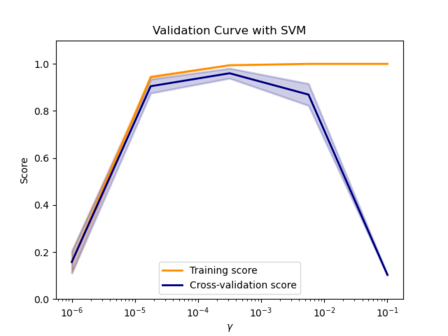

# Conclusions:
* For the small Titanic dataset even the humble decision tree classifier with the scikit-learn default settings slightly overfits the data.
* Using any of the more advanced estimators, such as random forest, XGBoost *etc.*, is almost certainly overkill for the Titanic data.

### Final remarks
If basically all estimators overfit the Titanic data, doesn't that imply that almost everybody is overfitting?
* *Yes.* 

...and isn't that a bad thing?
* *In general Yes*. However in the case of the Titanic nobody really cares because **there is no more data available to use**. Our Titanic models are never used in production so it is of no consequence it they overfit. The only thing of interest is the leaderboard score. Indeed, one of the [best scoring Titanic Notebooks](https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688) is that of Chris Deotte with, up until July 2020,  a score of `0.85167` on 50% of the test data. However, when the competition was modified to being evaluated with [100% of the test data](https://www.kaggle.com/c/titanic/discussion/163366) the aforementioned Notebook score dropped to `0.82535`, so even the #1 kaggle Grandmaster (knowingly, an important caveat) overfitted the Titanic.

...also:

* K-fold cross-validation **does not prevent overfitting**: all it is doing is trying it's very best to provide a more robust accuracy score, but it does not stop an overly flexible model from being an overly flexible model.

* An additional mechanism for overfitting is what is known as [target leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning%29); on kaggle the dataset used in the public leaderboard calculation is *always* the same one. If one becomes guided by the public leaderboard score each time one makes a submission, and iteratively goes back to adjust the model parameters/hyperparameters *etc*. to improve ones leaderboard score, then in some indirect way information about the leaderboard data actually becomes incorporated back into ones model. Doing this is tantamount to using the public leaderboard data as our test dataset.

* We have seen above that there is an *irreducible* error term for any realistic dataset; for the Titanic it is not possible to obtain a score of 100% with a model, and indeed I strongly suspect that it is not even possible to ever obtain a score of more than 85% with the Titanic dataset. (Note that any 100% score on the Titanic leaderboard was obtained by submitting the publicly available solution file, and was **not** the result of submitting a model). 

### *'Trust your CV'* and the shakeup
A mantra one sees over and over on kaggle competitions regarding overfitting is ***'Trust your CV'***. We have seen that overfitting the Titanic has little consequence. However overfitting the Public leaderboard score in a kaggle competition can have disastrous consequences when when at the end of the competition your work is compared to the, up till then, secret *Private leaderboard*. An underfitted model will under-perform and is unlikely to end up in the medals, but also a model that is overfitted so as to achieve as high a score as possible on the Public leaderboard will plummet down the rankings when it is finally compared to the Private leaderboard data. This is known as the *shakeup*. The solution to this is to tune your model, features, and parameters so that your resulting CV score closely matches the public leaderboard score, and if the data used to calculate the Public leaderboard is representative of the data used to calculate the Private leaderboard (which is *not* always the case!), then there should be no unwelcome surprises at the end of the competition. One can check whether the training data is indeed a good representative of the test data using a technique known as "adversarial validation". For more details see my notebook ["*What is Adversarial Validation?*"](https://www.kaggle.com/carlmcbrideellis/what-is-adversarial-validation).

If you are curious you can take a look at ["Shakeup scatterplots: Boxes, strings and things..."](https://www.kaggle.com/carlmcbrideellis/shakeup-scatterplots-boxes-strings-and-things) to see some of the things that can, and do, happen during shakeups, and one can also use the [shakeup interactive scatterplot maker](https://www.kaggle.com/carlmcbrideellis/shakeup-interactive-scatterplot-maker) to examine the shakeup of any particular past kaggle competition of interest.

# Related material
* ["Underfitting and Overfitting"](https://www.kaggle.com/dansbecker/underfitting-and-overfitting) by [Dan Becker](https://www.kaggle.com/dansbecker) in the kaggle course ["Intro to Machine Learning"](https://www.kaggle.com/learn/intro-to-machine-learning)
* ["Overfitting and Underfitting"](https://www.kaggle.com/ryanholbrook/overfitting-and-underfitting) by [Ryan Holbrook](https://www.kaggle.com/ryanholbrook) in the kaggle course ["Intro to Deep Learning"](https://www.kaggle.com/learn/intro-to-deep-learning)
* ["Overfitting"](https://en.wikipedia.org/wiki/Overfitting) on Wikipedia
* ["Cross-validation: evaluating estimator performance"](https://scikit-learn.org/stable/modules/cross_validation.html) on Scikit-learn
* [Trevor Hastie, Robert Tibshirani  and Jerome Friedman "The Elements of Statistical Learning" Springer (2nd edition)](https://web.stanford.edu/~hastie/ElemStatLearn/) Chapter 7: "*Model Assessment and Selection*"
* [Trevor Hastie and Robert Tibshirani "Cross-validation", (YouTube video)](https://youtu.be/ngrOYWgJjb4)
* [Trevor Hastie and Robert Tibshirani "K-fold Cross-validation", (YouTube video)](https://youtu.be/rSGzUy13F_0)
* [Gavin C. Cawley and Nicola L. C. Talbot "*On Over-fitting in Model Selection and Subsequent Selection Bias in Performance Evaluation*", Journal of Machine Learning Research, volume **11** pp. 2079-2107 (2010)](https://jmlr.csail.mit.edu/papers/volume11/cawley10a/cawley10a.pdf)
* [Sebastian Raschka "*Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning*", arXiv:1811.12808](https://arxiv.org/pdf/1811.12808.pdf)
* [Belkin *et al.* "*Reconciling modern machine-learning practice and the classical bias–variance trade-off*", PNAS vol. 116 15849-15854 (2019)](https://www.pnas.org/content/116/32/15849)